In [1]:
import pickle
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.manifold import TSNE

In [3]:
with open(os.path.join('/home/tohone06/','result','paper_drop_srgc_mlpt_202310' ,'hidden'), 'rb') as f:
    hidden = pickle.load(f)

In [4]:
tsne = TSNE(random_state = 42)
train_tsne = tsne.fit_transform(hidden)
hidden_tsne = pd.DataFrame(train_tsne)
hidden_tsne

/home/tohone06/.conda/envs/rtsgan/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/tohone06/.conda/envs/rtsgan/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,0,1
0,28.846092,64.988266
1,21.764488,-48.847282
2,41.436863,58.999378
3,29.005476,68.248657
4,-6.189806,-27.849337
...,...,...
12635,-49.199070,-27.861998
12636,-41.208027,-44.931419
12637,-50.185822,-60.245911
12638,-2.883304,-67.954910


In [5]:
with open(os.path.join('/home/tohone06/','result','paper_drop_srgc_mlpt_202310','gen_hidden'), 'rb') as f:
    gen_hidden = pickle.load(f)

In [6]:
tsne = TSNE(random_state = 42)
train_tsne = tsne.fit_transform(gen_hidden)
genhidden_tsne = pd.DataFrame(train_tsne)
genhidden_tsne

/home/tohone06/.conda/envs/rtsgan/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/tohone06/.conda/envs/rtsgan/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,0,1
0,29.506569,-32.265095
1,-2.498632,51.917965
2,1.740119,-52.263893
3,14.987412,-67.815926
4,-1.371729,-76.911438
...,...,...
12635,31.339464,0.578755
12636,1.702737,-25.739716
12637,47.779652,-15.576186
12638,-17.101568,-68.029350


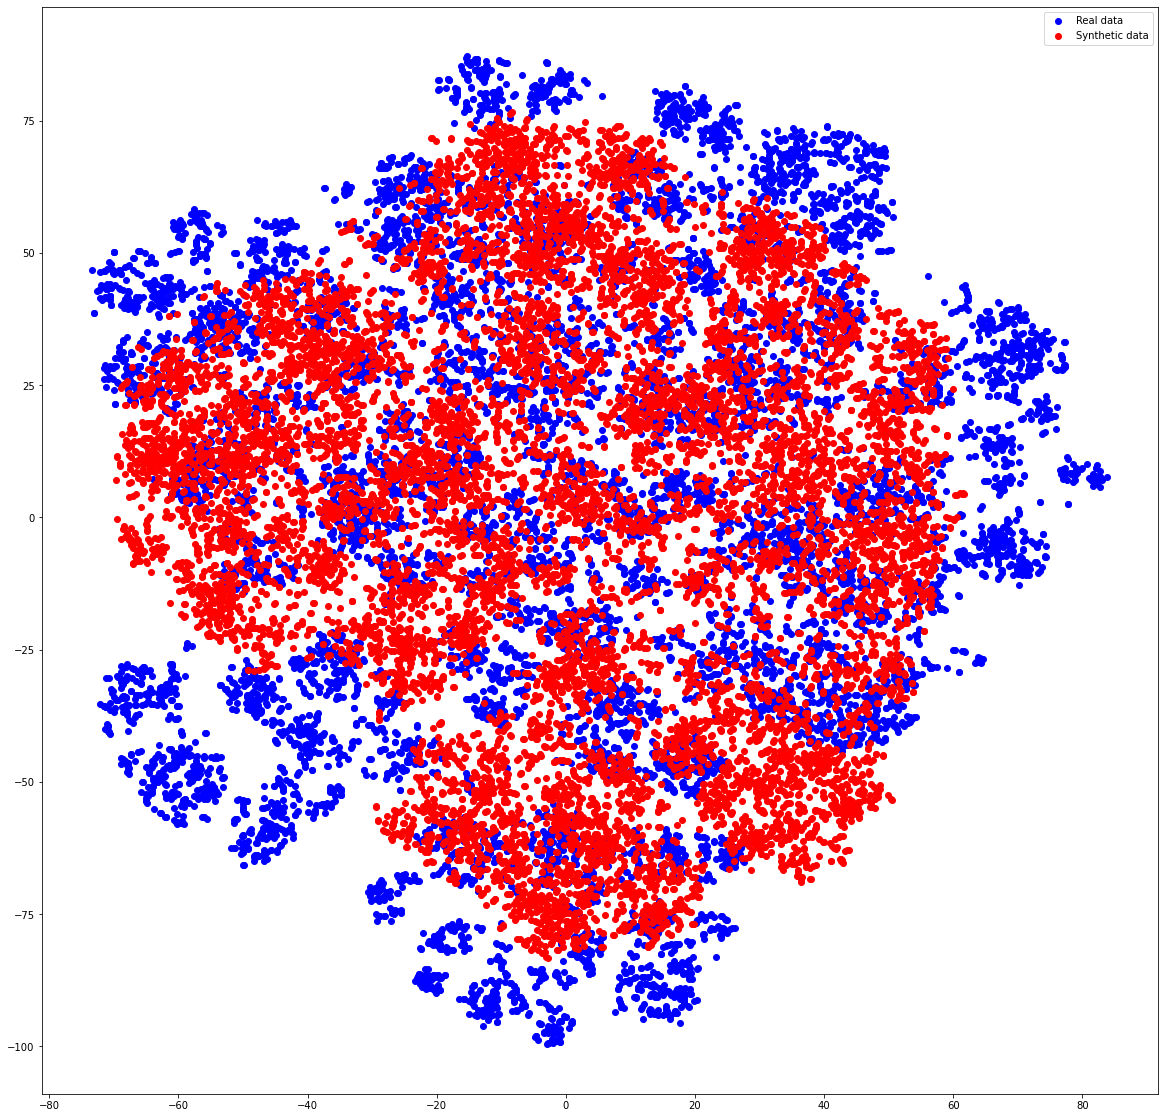

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))

plt.scatter(hidden_tsne[0],hidden_tsne[1], color = 'blue',label = 'Real data')
plt.scatter(genhidden_tsne[0],genhidden_tsne[1], color = 'red',label = 'Synthetic data')

plt.legend()

In [8]:
hidden_variance = hidden_tsne.var()
genhidden_variance = genhidden_tsne.var()

In [9]:
print("Hidden t-SNE Variance:")
print(hidden_variance)

print("Generated Hidden t-SNE Variance:")
print(genhidden_variance)

Hidden t-SNE Variance:
0    1396.505127
1    2010.857544
dtype: float32
Generated Hidden t-SNE Variance:
0    1023.269409
1    1500.073730
dtype: float32


In [10]:
variance_difference = hidden_variance - genhidden_variance

In [11]:
variance_difference

0    373.235718
1    510.783813
dtype: float32

In [12]:
from scipy.stats import levene

levene_test_x = levene(hidden_tsne[0], genhidden_tsne[0])
levene_test_y = levene(hidden_tsne[1], genhidden_tsne[1])

print("\nLevene's Test for Variance Homogeneity (Dimension 1):")
print(f"Statistic: {levene_test_x.statistic}, p-value: {levene_test_x.pvalue}")

print("\nLevene's Test for Variance Homogeneity (Dimension 2):")
print(f"Statistic: {levene_test_y.statistic}, p-value: {levene_test_y.pvalue}")



Levene's Test for Variance Homogeneity (Dimension 1):
Statistic: 377.48420157216, p-value: 1.786169757753158e-83

Levene's Test for Variance Homogeneity (Dimension 2):
Statistic: 340.51657378310944, p-value: 1.5448161120439043e-75
